In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

%matplotlib inline

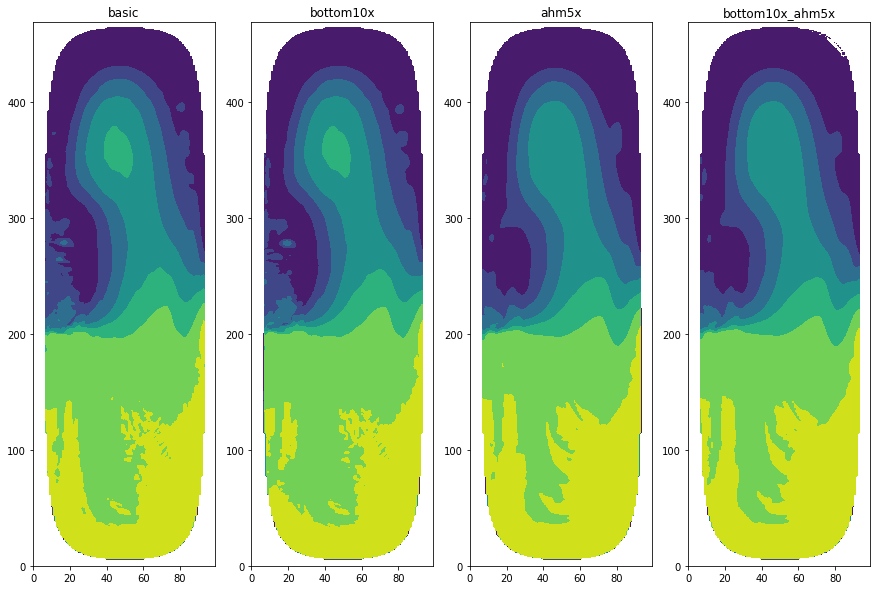

In [2]:
fig, axs = plt.subplots(1, 4, figsize=(15, 10))

for ax, runID in zip(axs, ['basic', 'bottom10x', 'ahm5x', 'bottom10x_ahm5x']):
    T = xr.open_dataset(f'/data/bmoorema/results/SalishSeaPond_{runID}_S4d/SalishSeaIdeal_1h_20170701_20170706_grid_T.nc')
    ax.contourf(T.x, T.y, T.vosaline.isel(time_counter=80, deptht=20), levels=np.arange(25, 33))
    ax.set_title(runID)